# Feature Engineering

## Dataset information

The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.

Class distribution (training set)
- A: 4286
- B: 5  
- C: 103 
- D: 352 
- E: 1095 
- F: 1961 
- G: 446 
- H: 519
- I: 831
- W: 44
- X: 522 
- Y: 266

ATTRIBUTE DESCRIPTION

|ID|Name| 
| :-: | :- |
|F1|intercolumnar distance|
|F2|upper margin|
|F3|lower margin|
|F4|exploitation| 
|F5|row number|
|F6|modular ratio|
|F7|interlinear spacing|
|F8|weight|
|F9|peak number|
|F10|modular ratio/ interlinear spacing|

Class: A, B, C, D, E, F, G, H, I, W, X, Y

## Retrieve datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [115]:
DATASET_CLASS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']
DATASET_COLUMNS = [
    'intercolumnar_dist',
    'upper_mrg',
    'lower_mrg',
    'exploit',
    'row_num',
    'modular_ratio',
    'spacing',
    'weight',
    'peak_num',
    'modular/spacing',
    'class'
]

In [298]:
path = "../datasets/"
train = pd.read_csv(f"{path}avila-tr.txt", header=None)
test = pd.read_csv(f"{path}avila-ts.txt", header=None)
data = pd.concat([train,test])

Rename Columns

In [299]:
namesDict = { index : value for index, value in enumerate(DATASET_COLUMNS) }
data = data.rename(namesDict, axis='columns')
data

,intercolumnar_dist,upper_mrg,lower_mrg,exploit,row_num,modular_ratio,spacing,weight,peak_num,modular/spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


## Data Exploration

Check the number of value for each group

In [41]:
data.groupby('class').size()

class
A    8572
B      10
C     206
D     705
E    2190
F    3923
G     893
H    1039
I    1663
W      89
X    1044
Y     533
dtype: int64

Sanity Check to verify that theire is not duplicated data

In [46]:
print(f"Number of lines in the datasets : {len(data)} and number of lines after droping the duplicates: {len(data.drop_duplicates())}")

Number of lines in the datasets : 20867 and number of lines after droping the duplicates: 20867


See the number of value for each class on each columns

In [48]:
data.groupby('class').nunique()

,intercolumnar_dist,upper_mrg,lower_mrg,exploit,row_num,modular_ratio,spacing,weight,peak_num,modular/spacing
class,,,,,,,,,,
A,87,150,158,320,38,234,187,8337,211,8224
B,1,1,1,1,1,8,8,10,10,10
C,8,8,9,9,5,91,56,206,92,205
D,17,25,21,26,8,145,74,703,115,698
E,45,62,58,79,15,135,115,2178,178,2165
F,59,83,90,140,16,154,109,3870,148,3798
G,27,23,27,31,7,109,54,889,115,889
H,29,24,31,37,4,125,70,1038,143,1035
I,32,42,43,53,11,127,101,1658,194,1647


Get general information about the columns statistics

In [5]:
data.describe()

,intercolumnar_dist,upper_mrg,lower_mrg,exploit,row_num,modular_ratio,spacing,weight,peak_num,modular/spacing
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648813,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


Verify number of N/A

In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
class,0,0.0
modular/spacing,0,0.0
peak_num,0,0.0
weight,0,0.0
spacing,0,0.0
modular_ratio,0,0.0
row_num,0,0.0
exploit,0,0.0
lower_mrg,0,0.0
upper_mrg,0,0.0


Show data correlation

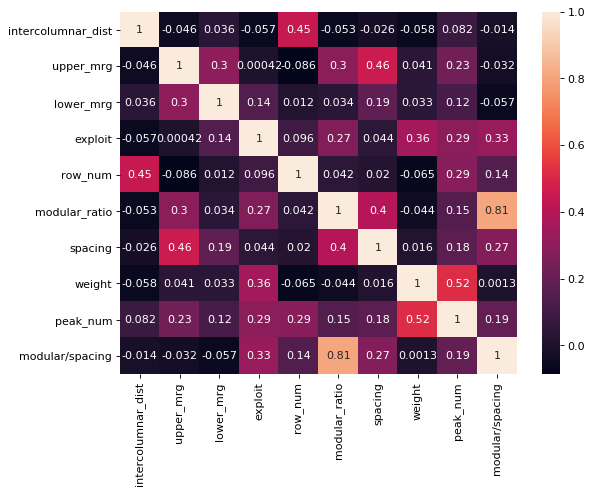

In [7]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Plot data by their class

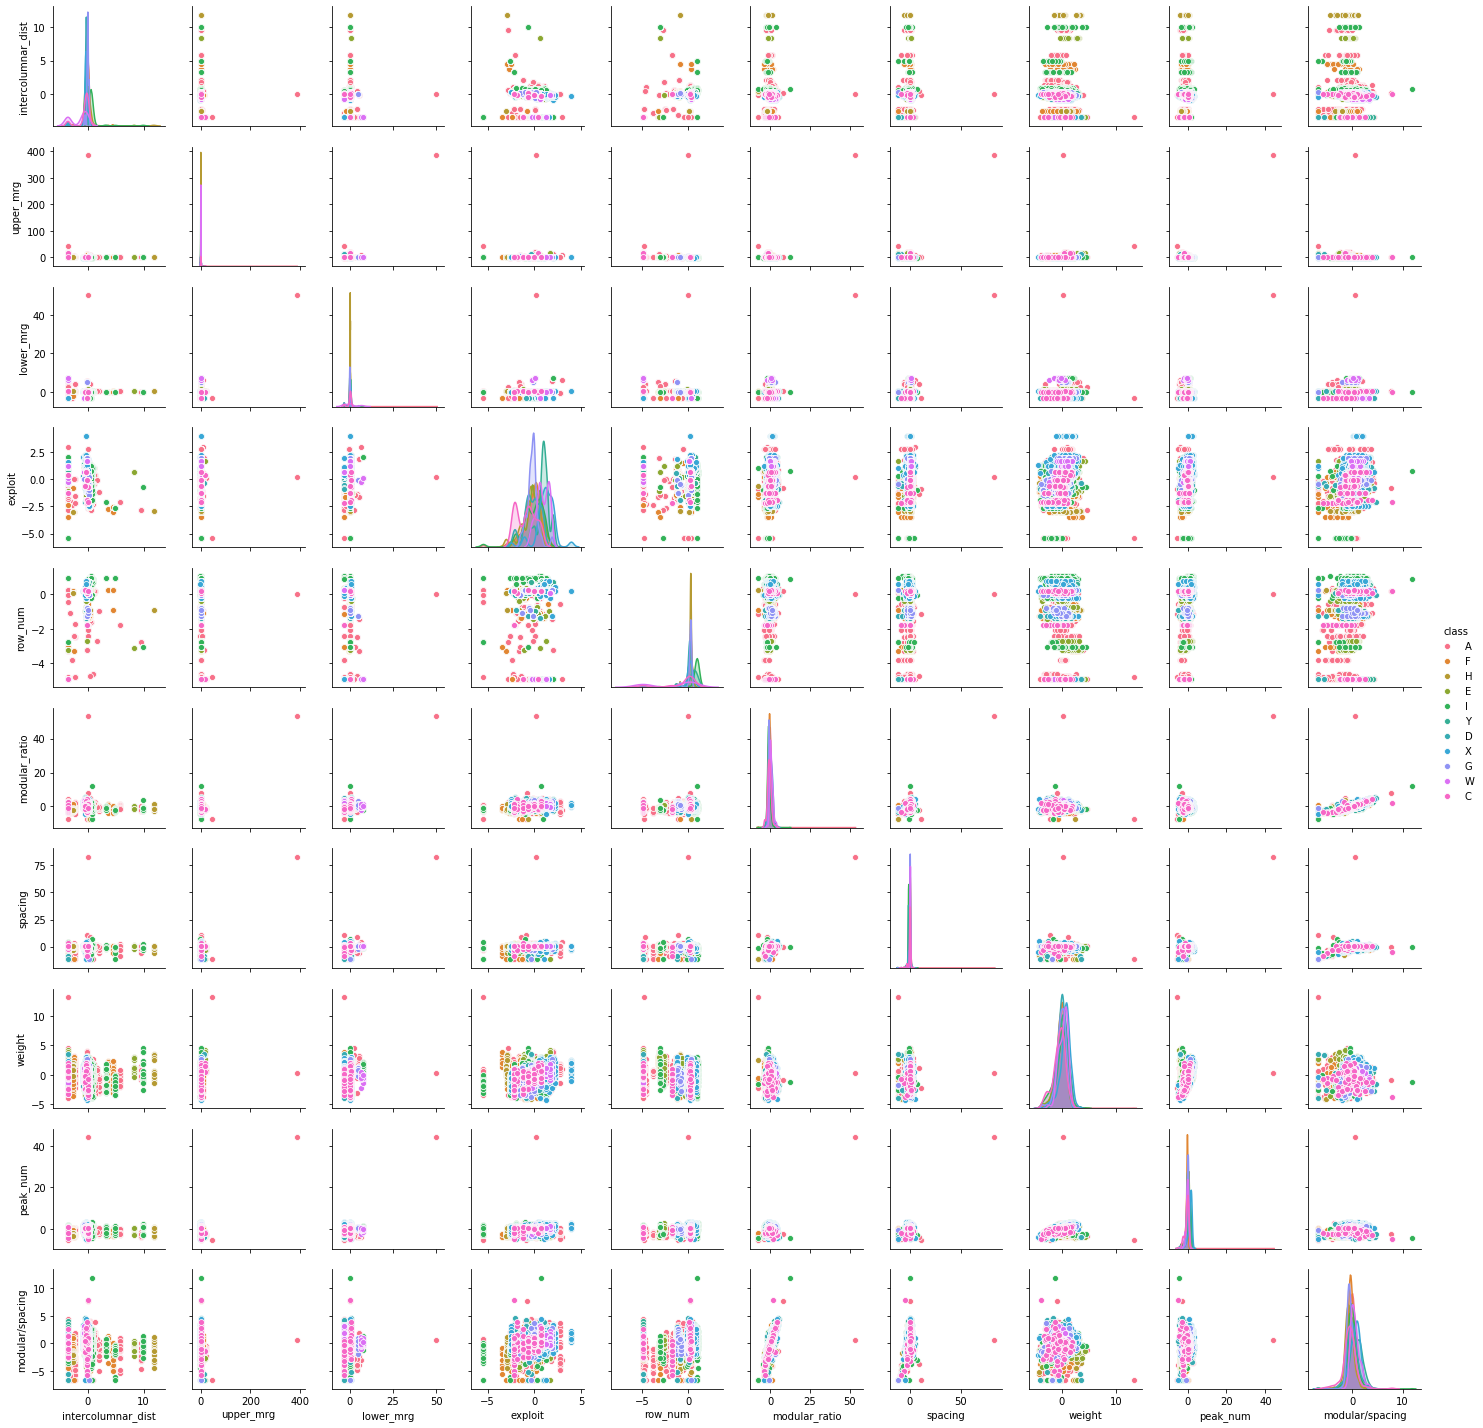

In [16]:
sns.pairplot(data[(data['class'] != 'B')], hue='class', height=2) # Remove 5 lines with B to avoid "Erro : Singularity matrix" Cf : https://stackoverflow.com/questions/40101519/plotting-event-density-in-python-with-ggplot-and-pandas

# Prediction

## Creating train and test datasets

In [323]:
from sklearn.model_selection import train_test_split

# ==== Params ==== #
testSize = 0.2
randomState = 107
# ================ #

x_train, x_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'] ,test_size = testSize, random_state=randomState)
print(f" Shape X : {x_train.shape} {x_test.shape}")
print(f" Shape Y : {y_train.shape}    {y_test.shape}")

 Shape X : (16693, 10) (4174, 10)
 Shape Y : (16693,)    (4174,)


Standardize values

In [307]:
from sklearn.preprocessing import StandardScaler,label_binarize

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)
y_train_multi = label_binarize(y_train, classes=DATASET_CLASS)
y_test_multi = label_binarize(y_test, classes=DATASET_CLASS)

Creating confusion matrix

In [290]:
from sklearn.metrics import confusion_matrix,accuracy_score

def ConfusionMatrix(y_test, predictions, title):
    cm = confusion_matrix(y_test, predictions)
    accur = accuracy_score(y_test, predictions)
    
    plt.matshow  (cm)
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.suptitle ('Confusion matrix (Accuracy of %.2f) for %s'%(accur,title))
    plt.colorbar ()
    plt.show     ()

Creating ROC curve for MultiClass Data

In [292]:
from sklearn.metrics import roc_curve, auc

def RocCurve(y_test, predictions, title):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label= 'ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(DATASET_CLASS[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

## Testing Classification Algorithm

### Logistic Regression

C:\Users\Med\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Med\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.52      0.93      0.67      1706
           B       1.00      1.00      1.00         1
           C       0.00      0.00      0.00        43
           D       0.00      0.00      0.00       148
           E       0.49      0.25      0.33       403
           F       0.38      0.10      0.16       795
           G       0.00      0.00      0.00       184
           H       0.42      0.19      0.26       223
           I       0.85      0.85      0.85       311
           W       0.50      0.04      0.07        25
           X       0.76      0.73      0.74       237
           Y       0.67      0.63      0.65        98

    accuracy                           0.55      4174
   macro avg       0.47      0.39      0.39      4174
weighted avg       0.48      0.55      0.47      4174



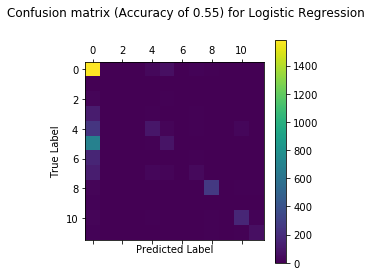

In [308]:
from sklearn.linear_model import LogisticRegression

name = 'Logistic Regression'

predictions = LogisticRegression().fit(x_train, y_train).predict(x_test)

print(classification_report(y_test, predictions))
ConfusionMatrix(y_test, predictions,name)

### Gradient Boosting

              precision    recall  f1-score   support

           A       0.99      1.00      1.00      1706
           B       1.00      1.00      1.00         1
           C       0.98      1.00      0.99        43
           D       1.00      1.00      1.00       148
           E       0.99      1.00      0.99       403
           F       1.00      0.99      0.99       795
           G       0.99      0.98      0.99       184
           H       0.99      0.99      0.99       223
           I       1.00      1.00      1.00       311
           W       1.00      1.00      1.00        25
           X       1.00      0.99      0.99       237
           Y       1.00      0.96      0.98        98

    accuracy                           0.99      4174
   macro avg       0.99      0.99      0.99      4174
weighted avg       0.99      0.99      0.99      4174



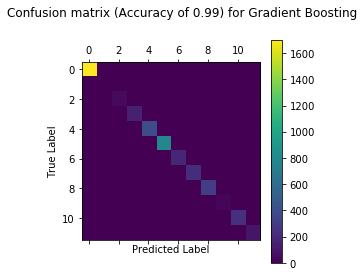

In [309]:
from sklearn.ensemble import GradientBoostingClassifier

name = 'Gradient Boosting'

predictions = RandomForestClassifier().fit(x_train, y_train).predict(x_test)

print(classification_report(y_test, predictions))
ConfusionMatrix(y_test, predictions,name)

### K-Nearest Neighbour (KNN)

              precision    recall  f1-score   support

           A       0.73      0.88      0.80      1706
           B       1.00      1.00      1.00         1
           C       0.85      0.40      0.54        43
           D       0.70      0.48      0.57       148
           E       0.74      0.66      0.69       403
           F       0.69      0.63      0.66       795
           G       0.67      0.46      0.54       184
           H       0.68      0.51      0.58       223
           I       0.98      0.93      0.95       311
           W       0.92      0.48      0.63        25
           X       0.94      0.81      0.87       237
           Y       0.85      0.79      0.81        98

    accuracy                           0.75      4174
   macro avg       0.81      0.67      0.72      4174
weighted avg       0.75      0.75      0.74      4174



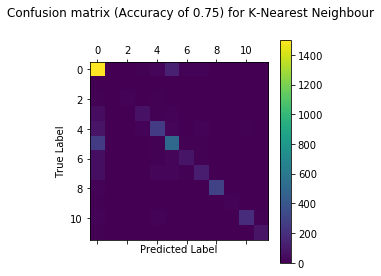

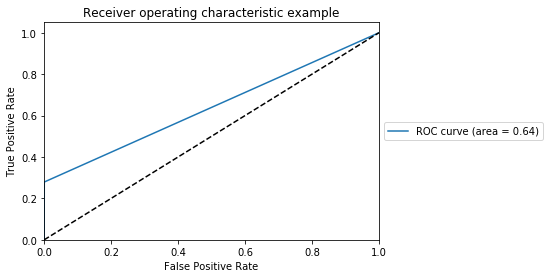

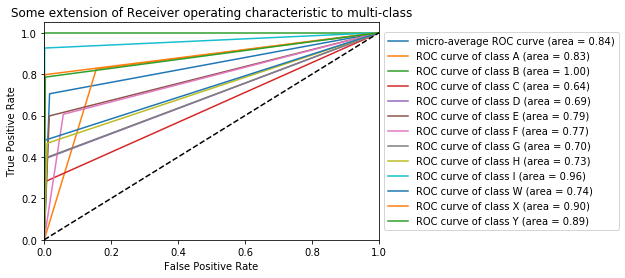

In [310]:
from sklearn.neighbors import KNeighborsClassifier

name = 'K-Nearest Neighbour'

predictions = KNeighborsClassifier().fit(x_train, y_train).predict(x_test)

print(classification_report(y_test, predictions))
ConfusionMatrix(y_test, predictions,name)

predictions = KNeighborsClassifier().fit(x_train, y_train_multi).predict(x_test)
RocCurve(y_test_multi, predictions, name)

### Decision Tree

              precision    recall  f1-score   support

           A       0.99      0.99      0.99      1706
           B       1.00      1.00      1.00         1
           C       0.96      1.00      0.98        43
           D       0.97      0.99      0.98       148
           E       0.98      0.97      0.98       403
           F       0.99      0.98      0.99       795
           G       0.99      0.99      0.99       184
           H       0.99      0.98      0.98       223
           I       0.98      1.00      0.99       311
           W       1.00      1.00      1.00        25
           X       0.96      0.96      0.96       237
           Y       0.99      0.97      0.98        98

    accuracy                           0.98      4174
   macro avg       0.98      0.99      0.98      4174
weighted avg       0.98      0.98      0.98      4174



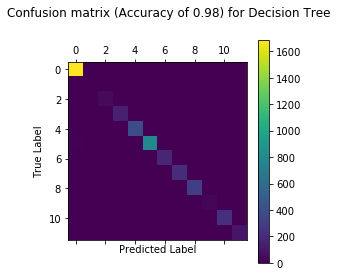

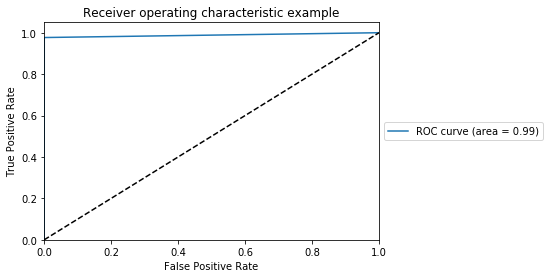

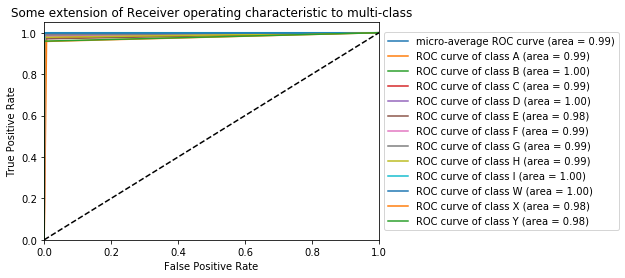

In [311]:
from sklearn.tree import DecisionTreeClassifier

name = 'Decision Tree'

predictions = DecisionTreeClassifier().fit(x_train, y_train).predict(x_test)

print(classification_report(y_test, predictions))
ConfusionMatrix(y_test, predictions,name)

predictions = DecisionTreeClassifier().fit(x_train, y_train_multi).predict(x_test)
RocCurve(y_test_multi, predictions, name)

### Random Forest

              precision    recall  f1-score   support

           A       0.99      1.00      1.00      1706
           B       1.00      1.00      1.00         1
           C       0.98      1.00      0.99        43
           D       1.00      1.00      1.00       148
           E       0.99      1.00      0.99       403
           F       1.00      0.99      1.00       795
           G       1.00      0.99      0.99       184
           H       1.00      0.98      0.99       223
           I       1.00      1.00      1.00       311
           W       1.00      1.00      1.00        25
           X       0.99      1.00      0.99       237
           Y       1.00      0.96      0.98        98

    accuracy                           1.00      4174
   macro avg       1.00      0.99      0.99      4174
weighted avg       1.00      1.00      1.00      4174



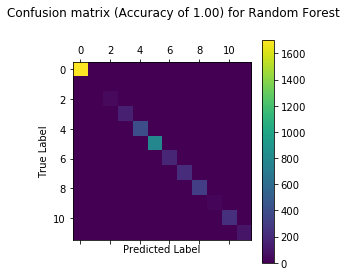

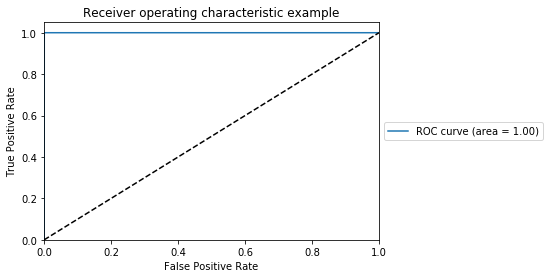

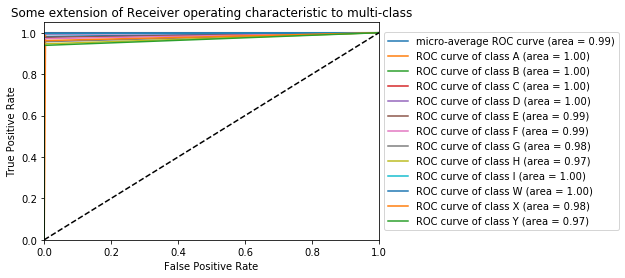

In [312]:
from sklearn.ensemble import RandomForestClassifier

name = 'Random Forest'

predictions = RandomForestClassifier().fit(x_train, y_train).predict(x_test)

print(classification_report(y_test, predictions))
ConfusionMatrix(y_test, predictions,name)

predictions = RandomForestClassifier().fit(x_train, y_train_multi).predict(x_test)
RocCurve(y_test_multi, predictions, name)

## Testing Hyperparameters

In [337]:
from sklearn.model_selection import GridSearchCV

def TestHyperparametres(calssifcationInfo, x_train, y_train):
    grid = GridSearchCV(calssifcationInfo['clf'](), calssifcationInfo['params'], n_jobs=-1)
    grid.fit(x_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_

In [338]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

classifcation = {
    "Logistic regression":{
        "clf": LogisticRegression,
        "params": {
            "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "penalty": ['none', 'l1', 'l2', 'elasticnet'],
            "C":[100, 10, 1.0, 0.1, 0.01]
        }
    },
    "K-Nearest Neighbour (KNN)":{
        "clf": KNeighborsClassifier,
        "params":{
            "n_neighbors": range(1,20),
            "metric": ['euclidean', 'manhattan', 'minkowski'],
            "weights": ['uniform', 'distance']
        }
    },
    "Decision tree":{
        "clf": DecisionTreeClassifier,
        "params":{
            "criterion": ['gini','entropy'],
            "max_depth": range(1,10),
            "min_samples_split":range(1,10),
            "min_samples_leaf":range(1,5)
        }
    },
    "Random Forest":{
        "clf": RandomForestClassifier,
        "params":{
            "max_features": range(1,20),
            "n_estimators": [10,100,100]
        }
    },
    "Gradient boosting": {
        "clf": GradientBoostingClassifier,
        "params":{
            "learning_rate":[0.001, 0.01, 0.1],
            "n_estimators": [10,100,100],
            "subsample": [0.5, 0.7, 1.0],
            "max_depth": [3, 7, 9]
        }
    }
}

In [339]:
for name, calssifcationInfo in classifcation.items():
    print(f'----------------- {name} -----------------')
    TestHyperparametres(calssifcationInfo,x_train,y_train)

----------------- Logistic regression -----------------
0.5649074225105517 LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
----------------- K-Nearest Neighbour (KNN) -----------------
0.865572331709551 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')
----------------- Decision tree -----------------
0.8243571309241636 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_sa

### Cross Validation of Gradient Boosting

I am probably overfitting here, so I use cross-validation to be sure of my results

In [340]:
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=9, subsample=0.5, n_estimators=100)
cross_val_score(clf, x_train, y_train, cv=10)

C:\Users\Med\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.9988024 , 0.99640719, 0.9994012 , 0.99940084, 0.99880168,
       0.99940084, 0.99700419, 0.99640503, 0.99640503, 0.99640503])

### Performance visualization

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

bestModel = {
    "Logistic regression": LogisticRegression(C=100, penalty='l2', solver='newton-cg'),
    "K-Nearest Neighbour (KNN)": KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance'),
    "Decision tree": DecisionTreeClassifier(criterion='entropy',max_depth=9, min_samples_leaf=1, min_samples_split=5),
    "Random Forest": RandomForestClassifier(max_features=9, n_estimators=100),
    "Gradient boosting": GradientBoostingClassifier(learning_rate=0.1, max_depth=9, subsample=0.5, n_estimators=100)
}

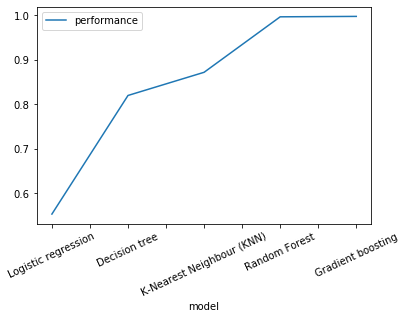

In [375]:
perf = {}
    
for name, clf in bestModel.items():
    clf.fit(x_train, y_train)
    perf[name] = clf.score(x_test, y_test)
    
df = pd.DataFrame(perf.items(),columns=['model','performance'])
df = df.sort_values("performance")
df.plot(rot=25, x="model")

## Save Model

In [34]:
import pickle

forest = RandomForestClassifier(random_state=0).fit(x_train, y_train)

with open('../api/model.pickle', 'wb') as handle:
    pickle.dump(forest, handle, protocol=pickle.HIGHEST_PROTOCOL)